# Zadanie 4 Pracownia Specjalistyczna - Eksploracja danych
### Krzysztof Funkowski

In [1]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 4
- Konstrukcja klasyfikatora liniowego w oparciu o kryterium Fishera 
- Wybór progu na podstawie dwu zbiorów danych

### Funkcja służąca do obliczania kowariancji dla dwóch wektorów

In [2]:
def cov(x, y, x_avg, y_avg):
    elements_count = len(x) # ilość elementów w tablicy
    elements_sum = 0
    
    for x,y in zip(x,y):
        elements_sum = elements_sum + ((x - x_avg)*(y - y_avg)) # sumowanie (x - średnia_arytmetyczna_x) * (y - średnia_arytmetyczna_y)
    
    return elements_sum / elements_count # suma dzielona przez liczbę elementów

### Funkcja obliczająca macierz kowariancji dla zbioru danych

In [3]:
def cov_for_dataset(cov_dataset):
    avgs = []
    matrix_shape = cov_dataset.shape[1] # wymiary_macierzy czyli liczba_kolumn_bioru_danych x liczba_kolumn_bioru_danych
    for i in range(matrix_shape):
        avgs.append(cov_dataset[:,i].mean()) # obliczanie średnich dla każdego parametru
    
    matrix = []
    for i in range(matrix_shape):
        matrix_row = []
        for j in range(matrix_shape):
            #matrix_shape*i + j
            res = cov(cov_dataset[:,i],cov_dataset[:,j],avgs[i], avgs[j]) # wyznaczanie kowariancji dla każdej pary parametrów
            matrix_row.append(res) # budowanie wiersza macierzy
        matrix.append(matrix_row) # dodawanie wiersza macierzy do tablicy bazowej
    
    return np.matrix(matrix) # przekształcanie typu tablicy na macierz

### Funkcja do obliczania długości wektora własnego

In [4]:
def eigenvector_len(v1):
    dims = v1.shape[0] # ilość elementów wektora
    length = 0
    
    for i in range(dims):
        val = v1[i].ravel().tolist()[0][0]
        length = length + pow(val,2) # sumowanie elementów podniesionych do kwadratu
        
    
    length = sqrt(length) # pierwiastkowanie wyniku sumy elementów wektora podniesionych do kwadratów
    
    return length # zwracanie długości

### Funkcja normalizująca, zwracająca wartość własną i wektor własny

In [5]:
def eigenvector_normalization(v1):
    eigenvalue = eigenvector_len(v1) # wylicznaie wartości własnej
    eigenvector = v1 / eigenvalue # wyliczanie wektora własnego
    
    return eigenvalue, eigenvector # zwrócenie wartości własnej i wektora własnego

### Pomocnicza funkcja zmieniająca tablicę wektorów własnych w odpowiednią formę macierzy

In [6]:
def rearrange_matrix(eigenvectors):
    res = []

    for i in range(len(eigenvectors)):
        row = eigenvectors[i].ravel().tolist()[0]
        res.append(row)

    return np.matrix(res).T

### Funkcja odpowiadająca za obliczanie wartości własnych i wektorów własnych

In [7]:
def eigenvalues_eigenvectors(matrix, num_iterations):
    n = matrix.shape[0] # jeden z wymiarów macierzy, ponieważ jest kwadratowa to wystarczy tylko jeden
    eigenvalues = [] # lista na wartości własne
    eigenvectors = [] # lista na wektory własne
    
    for i in range(n):
        # losowe dane wektora na początku
        eigenvector = np.random.rand(n,1)
    
        # algorytm iteracyjny wykonywany num_iterations razy
        for _ in range(num_iterations):
            eigenvector = np.dot(matrix, eigenvector) # mnożenie macierzy kowariancji przez wektor 
            eigenvalue, eigenvector = eigenvector_normalization(eigenvector) # normalizacja wektora
            
        # usuwanie z macierzy znalezionej wartości własnej i wektora własnego
        # marix - wartość własna * iloczyn zewnętrzny wektora własnego
        matrix = matrix - eigenvalue * np.multiply(eigenvector,eigenvector.T).T 
        
        eigenvalues.append(eigenvalue) # dodanie znalezionej wartości własnej do listy
        eigenvectors.append(eigenvector) # dodanie znalezionego wektora własnego do listy
        
        
        
    return eigenvalues, rearrange_matrix(eigenvectors) # zwrócenie wartości własnych i wektorów własnych

In [8]:
def draw_plot(datasets):
    colors = ['red','blue','green']
    
    print(len(datasets))
    
    # dla każdego zbioru danych z danej kategorii
    for i in range(len(datasets)):
        # przejście po wszystkich punktach
        for j in range(datasets[i][1].shape[0]):
            if j==0:
                # zaznaczanie punktu dla pierwszego (SepalLengthCm) i drugiego (SepalWidthCm) parametru
                plt.scatter(datasets[i][1][j,0],datasets[i][1][j,1], color=colors[i], label=datasets[i][0]) 
            else:
                # zaznaczanie punktu dla pierwszego (SepalLengthCm) i drugiego (SepalWidthCm) parametru
                plt.scatter(datasets[i][1][j,0],datasets[i][1][j,1], color=colors[i])
    
    plt.grid()
    plt.legend()
    plt.show() 

# ZADANIE

In [9]:
df = pd.read_csv('Iris.csv', sep=',', index_col=0)
dataset = df.to_numpy()
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [10]:
species = np.array(list(set(dataset[:,4])))
species

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype='<U15')

In [11]:
species1 = df[df['Species'].str.contains('Iris-virginica')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species1 = species1[:, [0, 1, 2, 3]]

In [12]:
num_iterations = 10000 # ustalenie liczby iteracji
species1_cov_matrix = cov_for_dataset(species1) # macierz kowariancji dla głównego w tym momencie gatunku
# wartości własne i wektory własne dla badanego gatunku
species1_eigenvalues, species1_eigenvectors = eigenvalues_eigenvectors(species1_cov_matrix,num_iterations)
print(f'Iris-setosa: \n macierz cov:\n{species1_cov_matrix} \n\n wartości własne: {species1_eigenvalues}\n wektory własne:\n{species1_eigenvectors}')

Iris-setosa: 
 macierz cov:
[[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]] 

 wartości własne: [0.681349741460896, 0.10442020142375678, 0.05124951922482231, 0.03358053789052519]
 wektory własne:
[[ 0.74101679 -0.16525895 -0.53445017 -0.37141165]
 [ 0.20328772  0.74864279 -0.3253749   0.54068405]
 [ 0.62789179 -0.16942776  0.65152357  0.39059336]
 [ 0.12377451  0.61928804  0.4289653  -0.64587225]]


In [13]:
current_datasets = [] # lista w której będą zbiory do rysowania
s1 = np.asarray(species1 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-virginica',s1))

In [14]:
species2 = df[df['Species'].str.contains('Iris-setosa')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species2 = species2[:, [0, 1, 2, 3]]
s2 = np.asarray(species2 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-setosa',s2))

In [15]:
species3 = df[df['Species'].str.contains('Iris-versicolor')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species3 = species3[:, [0, 1, 2, 3]]
s3 = np.asarray(species3 * species1_eigenvectors[:,:2])
current_datasets.append(('Iris-versicolor',s3))

3


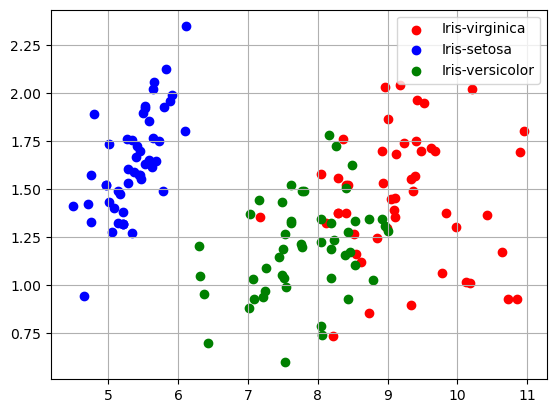

In [16]:
draw_plot(current_datasets)

In [17]:
s2

array([[5.394496031833511, 1.6640878680146136],
       [5.144648815819721, 1.3228182609669574],
       [4.97431382284356, 1.522541386571688],
       [5.00546172931682, 1.4303174499042994],
       [5.340723124597194, 1.7554780427207368],
       [5.911238592534799, 1.986996579992995],
       [5.016036316729802, 1.7337818686867497],
       [5.3628547598032466, 1.588806707539709],
       [4.753811649745712, 1.3305834575319426],
       [5.2153893150016835, 1.3188109601615943],
       [5.720247790289675, 1.7472959651751185],
       [5.277440580536663, 1.6049157217709276],
       [5.058169685964366, 1.277415352071658],
       [4.499293756028517, 1.4108731567083674],
       [5.889273285265524, 1.956613551387981],
       [6.109609130426593, 2.3456258442137683],
       [5.660081878520697, 2.0547676847629317],
       [5.406873482803811, 1.7260166721217645],
       [6.100837406570925, 1.8006258107560185],
       [5.530648976253547, 1.9336667344120952],
       [5.784839832350516, 1.488817574307335]

In [18]:
s2_m = np.matrix(s2)
s3_m = np.matrix(s3)

In [19]:
def calculate_s(matrix):
    means = np.mean(matrix, axis=0)
    res = matrix - means
    return np.dot(res.T, res)

In [28]:
s2_m_mean = np.mean(s2_m, axis=0)
s3_m_mean = np.mean(s3_m, axis=0)
print(f'Wartości średnie w macierzach Setosa: {s2_m_mean}, Versicolor: {s3_m_mean}')

Wartości średnie w macierzach Setosa: [[5.353802013598783 1.6346387973724075]], Versicolor: [[7.80072663740321 1.192177078876823]]


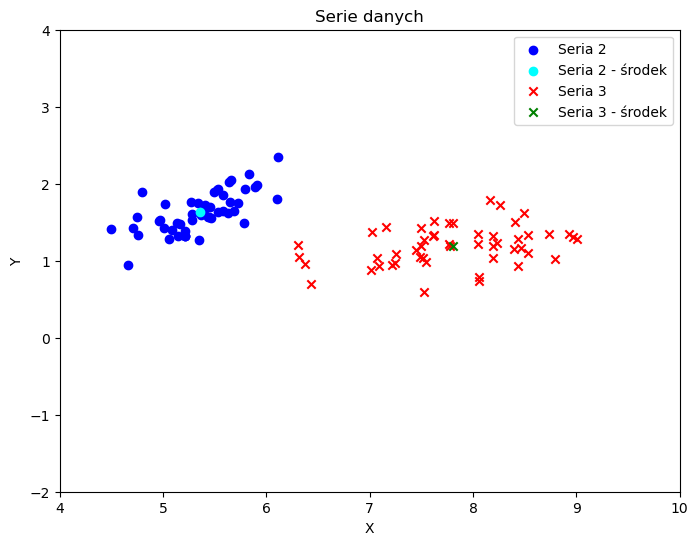

In [52]:
plt.figure(figsize=(8, 6))

plt.scatter(s2[:,[0]], s2[:,[1]], label='Seria 2', color='blue', marker='o')
plt.scatter(s2_m_mean[0, 0], s2_m_mean[0, 1], label='Seria 2 - średnia', color='cyan', marker='o')
plt.scatter(s3[:,[0]], s3[:,[1]], label='Seria 3', color='red', marker='x')
plt.scatter(s3_m_mean[0, 0], s3_m_mean[0, 1], label='Seria 3 - średnia', color='green', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(4, 10)
plt.ylim(-2, 4)

plt.legend()
plt.title('Serie danych')
plt.show()

In [53]:
Sw = calculate_s(s2_m)+calculate_s(s3_m)
Sw = Sw.astype(np.float64)
Sw

matrix([[30.21039  ,  6.27768  ],
        [ 6.27768  ,  6.5588438]])

In [54]:
w = np.linalg.inv(Sw) * (s3_m_mean.T - s2_m_mean.T)
w = w / sqrt(np.dot(w.T, w)[0, 0]) # [0, 0] ponieważ wyciągamy ten element z obiektu np.Matrix żeby przyjęło go sqrt
w

matrix([[0.548125428214125],
        [-0.8363961471366795]], dtype=object)

In [32]:
s2_m_proj_w = s2_m * np.outer(w, w)
s2_m_proj_w

matrix([[0.8578293219828679, -1.3089798481800332],
        [0.9392199034571745, -1.4331754524236129],
        [0.7964811390148987, -1.2153673623746846],
        [0.8481193257165599, -1.2941631601597157],
        [0.7997758846206472, -1.2203948841581966],
        [0.8650427264974002, -1.3199869342102333],
        [0.7121731087929618, -1.0867199615780105],
        [0.8828356189666953, -1.3471374839598098],
        [0.8182362505307114, -1.2485639457035025],
        [0.9623104311243449, -1.4684097754126015],
        [0.9175519122168313, -1.400111807759905],
        [0.8497884785883014, -1.2967101557177494],
        [0.9340529486725033, -1.4252910871818667],
        [0.7049597042784307, -1.0757128755478125],
        [0.8723725363134637, -1.331171645544233],
        [0.7602278806355391, -1.160047751079801],
        [0.7585151676260633, -1.1574342861892126],
        [0.833156761719425, -1.271331468298121],
        [1.0074477542192914, -1.537285768361297],
        [0.7751468844949391, -1.18281

In [34]:
s3_m_proj_w = s3_m * np.outer(w, w)
s3_m_proj_w

matrix([[2.092203512366572, -3.1925374498145462],
        [1.835230082378776, -2.8004162751801767],
        [2.1191691388047897, -3.2336848677176655],
        [1.7367854197104262, -2.6501974888884154],
        [2.0045571764011516, -3.058796057901805],
        [1.788554286825291, -2.7291926946711125],
        [1.8057678641887818, -2.7554592552869397],
        [1.4171288598731238, -2.162426804857239],
        [2.0555278896620437, -3.136573343891108],
        [1.4831067353283798, -2.2631038360375593],
        [1.6130878436133338, -2.461444749584123],
        [1.662564682612917, -2.5369425013424802],
        [1.988214598055431, -3.033858573050619],
        [1.9082896438758663, -2.911899400396164],
        [1.4908138420025618, -2.2748642726019783],
        [1.9510032203828336, -2.9770769473259864],
        [1.6529418066220773, -2.5222587519872723],
        [1.8140978461065032, -2.7681701503176646],
        [2.057690275423617, -3.1398729739146507],
        [1.7329103209393775, -2.64428439397

In [45]:
s2_m_mean_proj_w = s2_m_mean * w * w.T
s2_m_mean_proj_w

matrix([[0.8591040770387072, -1.310925023795623]], dtype=object)

In [47]:
s3_m_mean_proj_w = s3_m_mean * w * w.T
s3_m_mean_proj_w

matrix([[1.7971083180417746, -2.742245471250488]], dtype=object)

In [74]:
s2_proj_w = np.asarray(s2_m_proj_w[:,[0,1]])
s3_proj_w = np.asarray(s3_m_proj_w[:,[0,1]])

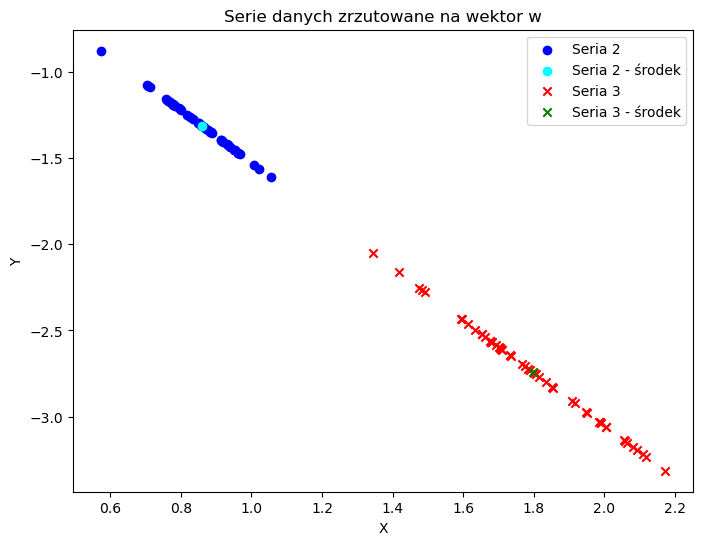

In [77]:
plt.figure(figsize=(8, 6))

plt.scatter(s2_proj_w[:,[0]], s2_proj_w[:,[1]], label='Seria 2', color='blue', marker='o')
plt.scatter(s2_m_mean_proj_w[0, 0], s2_m_mean_proj_w[0, 1], label='Seria 2 - średnia', color='cyan', marker='o')
plt.scatter(s3_proj_w[:,[0]], s3_proj_w[:,[1]], label='Seria 3', color='red', marker='x')
plt.scatter(s3_m_mean_proj_w[0, 0], s3_m_mean_proj_w[0, 1], label='Seria 3 - średnia', color='green', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

#plt.xlim(4, 10)
#plt.ylim(-2, 4)

plt.legend()
plt.title('Serie danych zrzutowane na wektor w')
plt.show()

In [117]:
s2_t = np.dot(s2_m_proj_w, w)
s2_t = np.hstack((s2_t, np.ones((s2_t.shape[0], 1))))

s3_t = np.dot(s3_m_proj_w, w)
s3_t = np.hstack((s3_t, 2*np.ones((s3_t.shape[0], 1))))

In [118]:
s23_t = np.concatenate((s2_t, s3_t), axis=0)
s23_t = np.matrix(np.array(s23_t[np.argsort(s23_t.getA()[:, 0])])) # sortowanie po pierwszej kolumnie
s23_t

matrix([[1.5650237661438275, 1.0],
        [1.7135127383476703, 1.0],
        [1.4531001446328702, 1.0],
        [1.54730884950888, 1.0],
        [1.459111078328253, 1.0],
        [1.5781839009290985, 1.0],
        [1.2992885791000952, 1.0],
        [1.6106452529361872, 1.0],
        [1.492790168842646, 1.0],
        [1.7556390957078876, 1.0],
        [1.6739816563634957, 1.0],
        [1.550354051912972, 1.0],
        [1.7040861463329446, 1.0],
        [1.2861284443148264, 1.0],
        [1.5915564055398497, 1.0],
        [1.386959702111387, 1.0],
        [1.3838350285944951, 1.0],
        [1.5200111486051195, 1.0],
        [1.8379876253902465, 1.0],
        [1.4141779319023462, 1.0],
        [1.9255765273172218, 1.0],
        [1.42063879262578, 1.0],
        [1.047005367779917, 1.0],
        [1.6786945243029403, 1.0],
        [1.6961157061639247, 1.0],
        [1.8651263840684051, 1.0],
        [1.5692072359424225, 1.0],
        [1.6680501937809125, 1.0],
        [1.6709364539594023, 

matrix([[1.047005367779917, 1.0],
        [1.2861284443148264, 1.0],
        [1.2897825159725709, 1.0],
        [1.2992885791000952, 1.0],
        [1.3838350285944951, 1.0],
        [1.386959702111387, 1.0],
        [1.3927294724968542, 1.0],
        [1.4042219417467705, 1.0],
        [1.4141779319023462, 1.0],
        [1.4169847209680362, 1.0],
        [1.42063879262578, 1.0],
        [1.4224662565225685, 1.0],
        [1.4277085226028663, 1.0],
        [1.4472481531630872, 1.0],
        [1.4531001446328702, 1.0],
        [1.459111078328253, 1.0],
        [1.492790168842646, 1.0],
        [1.5077777675247046, 1.0],
        [1.5200111486051195, 1.0],
        [1.54730884950888, 1.0],
        [1.550354051912972, 1.0],
        [1.5635141866982418, 1.0],
        [1.5650237661438275, 1.0],
        [1.5678305552095178, 1.0],
        [1.5692072359424225, 1.0],
        [1.5781839009290985, 1.0],
        [1.5915564055398497, 1.0],
        [1.598861798883823, 1.0],
        [1.6106452529361872, 1